# Pre-Processing

We need to create a dataframe that tracks the results for each area and number of bedrooms.
So we need to solve the problem of not having a shape file for suburb boundaries. To fix this I will track by SA2 zone instead. So I will average over the zone for each number of bedrooms.

In [2]:
import sys
import os
repo_path = os.path.abspath('../')
sys.path.append(repo_path)
import pandas as pd
import geopandas as gpd
import geoplot as gplt
import scripts.addSA2 as addSA2

/home/dylan/.local/lib/python3.8/site-packages/geoplot/geoplot.py:885: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


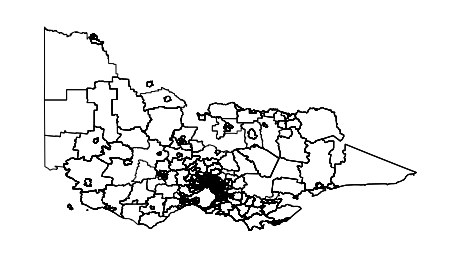

In [9]:
df = pd.read_csv(f"../data/curated/pre_processed_data.csv")
df = addSA2.addSA2(df, use_postcode = False)
df = df.loc[df["SA2"] != 0]
ax = gplt.polyplot(df)

In [10]:
df.dtypes

url                                    object
postcode                                int64
suburb                                 object
state                                  object
weekly_rent                           float64
bond                                  float64
num_beds                              float64
num_baths                             float64
num_parking                           float64
property_type                          object
internal_area                         float64
land_area                             float64
last_sold                             float64
other_sold_n_bed_suburb               float64
neighbourhood_under_20                float64
neighbourhood_20_to_39                float64
neighbourhood_40_to_59                float64
neighbourhood_above_60                float64
neighbourhood_long_term_residents     float64
neighbourhood_owners                  float64
neighbourhood_renter                  float64
neighbourhood_family              

In [32]:
# Groupby number of beds and suburb
df["sold_per_population"] = df["performance_sold_this_year"]/df["demographic_population"]
features = ["performance_auction_clearance", "performance_avg_days_on_market", "sold_per_population", "num_beds", "SA2", "suburb"]
df_SA2 = df[features].groupby(by=["num_beds", "suburb", "SA2"])

In [33]:
df_SA2 = df_SA2.mean().dropna().reset_index()

In [34]:
df_SA2

,num_beds,suburb,SA2,performance_auction_clearance,performance_avg_days_on_market,sold_per_population
0,1.0,abbotsford,206071139.0,0.40,104.0,0.007219
1,1.0,abeckett street,206041504.0,0.41,121.0,0.008355
2,1.0,albion,206011107.0,0.36,74.0,0.004307
3,1.0,alexandra,206051134.0,0.45,103.0,0.005725
4,1.0,alexandra,206061515.0,0.51,92.0,0.011139
...,...,...,...,...,...,...
2202,5.0,wantirna south,211011254.0,0.84,56.0,0.001764
2203,5.0,werribee,213051467.0,0.43,98.0,0.001190
2204,5.0,werribee,213051468.0,0.43,98.0,0.001190
2205,5.0,wheelers hill,212051327.0,0.64,41.0,0.002431


In [9]:
approvals = pd.read_csv("../data/raw/datasource-AU_Govt_ABS-UoM_AURIN_DB_3 abs_building_approvals_sa2_2020_21.csv")
approvals = approvals[["sa2_code", "new_houses_no", "new_other_residential_building_no", "value_of_new_houses_000", "value_of_new_other_residential_building_000"]

In [10]:
df_SA2 = df_SA2.join(approvals.set_index("sa2_code"), on = "SA2")

In [11]:
df

,num_beds,SA2,performance_auction_clearance,performance_avg_days_on_market,sold_per_population,new_houses_no,new_other_residential_building_no,value_of_new_houses_000,value_of_new_other_residential_building_000
0,1.0,206011106.0,0.710000,66.000000,0.006520,3,85,1513.0,29269.0
1,1.0,206011107.0,0.306800,71.461538,0.004156,16,23,7273.0,7683.0
2,1.0,206011495.0,0.448667,78.133333,0.004516,8,132,4252.8,32315.5
3,1.0,206011496.0,0.430000,80.600000,0.004189,5,217,3956.6,82216.8
4,1.0,206021110.0,0.800000,83.000000,0.005188,9,41,8117.0,21051.1
...,...,...,...,...,...,...,...,...,...
885,5.0,213051467.0,0.430000,98.000000,0.001190,10,23,2343.5,6388.8
886,5.0,213051468.0,0.430000,98.000000,0.001190,1270,86,364461.4,17915.8
887,5.0,213051580.0,0.390000,49.000000,0.002624,5,2,2335.3,604.5
888,5.0,213051581.0,0.390000,49.000000,0.002624,24,3,8251.6,1100.0


We get a dataframe that contains the population of each suburb, and the most common SA2 zone of that suburb

In [19]:
sa2_pop = df[["demographic_population", "SA2","suburb"]].groupby(["SA2", "suburb"])
sa2_pop = sa2_pop.mean().dropna().reset_index().astype({"SA2":"object"})
sa2_pop

,SA2,suburb,demographic_population
0,201011001.0,alfredton,9218.0
1,201011001.0,cardigan,741.0
2,201011001.0,dromana,9218.0
3,201011001.0,heathcote,9218.0
4,201011001.0,linga,9218.0
...,...,...,...
2162,217041480.0,raglan,29667.0
2163,217041480.0,shirley,29667.0
2164,217041480.0,stanley,29667.0
2165,217041480.0,timor,29667.0


In [15]:
We know have a dataframe with the populatino

,SA2,suburb,demographic_population
0,201011001.0,alfredton,9218.0
1,201011001.0,cardigan,741.0
2,201011001.0,dromana,9218.0
3,201011001.0,heathcote,9218.0
4,201011001.0,linga,9218.0
...,...,...,...
2162,217041480.0,raglan,29667.0
2163,217041480.0,shirley,29667.0
2164,217041480.0,stanley,29667.0
2165,217041480.0,timor,29667.0


In [168]:
pop = sub_pop.join(sa2_pop.set_index("SA2"), on = "SA2")

/home/dylan/.local/lib/python3.8/site-packages/pandas/core/indexes/base.py:6982: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


ValueError: You are trying to merge on object and float64 columns. If you wish to proceed you should use pd.concat